<a href="https://colab.research.google.com/github/Pagido/projet/blob/main/decision_profession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pension selon la profession


In [ ]:
! pip install mca

  Preparing metadata (setup.py) ... done
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6009 sha256=0d60bcb9237f268cfba96b5222721c9e59291a10894a3c5bbdf6af5efbcfdc96
  Stored in directory: /root/.cache/pip/wheels/41/3c/28/32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca


In [ ]:
import pandas as pd
import os #module pour connaitre et modifier le répertoire courant où Python cherche les modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
!pip install fanalysis
from fanalysis.ca import CA as fCA
from fanalysis.mca import MCA as fMCA
from mca import MCA
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/Data/decision.xlsx" #pour modifier le répertoire de travail attention aux \ à transformer en /

data = pd.read_excel("/content/drive/My Drive/Data/decision.xlsx", index_col = 0) # La ville sert d'index des observations (index_col=0)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Décision de la Commission,Profession
id,,
1,< 500 fr,employé
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,artisan


In [ ]:
data.shape

(3780, 2)

In [ ]:
data.columns

Index(['Décision de la Commission', 'Profession'], dtype='object')

In [ ]:
#df.dtypes
data.describe()

,Décision de la Commission,Profession
count,658,2749
unique,5,8
top,1000 fr ≤ x ≤ 1500 fr,artisan
freq,260,991


In [ ]:
contingence = pd.crosstab(data['Décision de la Commission'], data['Profession'], margins = False)
#attention si on ne précise pas margins=False, Python compte les marges dans le calcul du ddl
stats.chi2_contingency(contingence) #Test d'indépendance du Khi² dans la librairie scipy

#Khi2obs, pvalue, ddl, effectifs_theorique =stats.chi2_contingency(contingence)

Chi2ContingencyResult(statistic=21.76784539228197, pvalue=0.41299225840604487, dof=21, expected_freq=array([[6.50078740e+00, 3.37228346e+01, 8.93858268e+00, 1.13763780e+01,
        1.62519685e+00, 1.16201575e+02, 3.77858268e+01, 4.18488189e+01],
       [2.26771654e-01, 1.17637795e+00, 3.11811024e-01, 3.96850394e-01,
        5.66929134e-02, 4.05354331e+00, 1.31811024e+00, 1.45984252e+00],
       [5.03937008e+00, 2.61417323e+01, 6.92913386e+00, 8.81889764e+00,
        1.25984252e+00, 9.00787402e+01, 2.92913386e+01, 3.24409449e+01],
       [4.23307087e+00, 2.19590551e+01, 5.82047244e+00, 7.40787402e+00,
        1.05826772e+00, 7.56661417e+01, 2.46047244e+01, 2.72503937e+01]]))

Tableau de contingence:
                                         1000 fr ≤ x ≤ 1500 fr  1200 fr  \
Apprenti/étudiant                                            8        0   
Entrepreneurs commerciaux                                   33        1   
Personnels des armées                                       12        0   
Professions intellectuelles supérieures                      9        0   
Artisan                                                    105        8   
Employé                                                     42        0   
Ouvrier                                                     49        0   
All                                                        258        9   

                                         500 fr ≤ x ≤ 900 fr  < 500 fr  All  
Apprenti/étudiant                                          5         3   16  
Entrepreneurs commerciaux                                 25        24   83  
Personnels des armées                                      7      

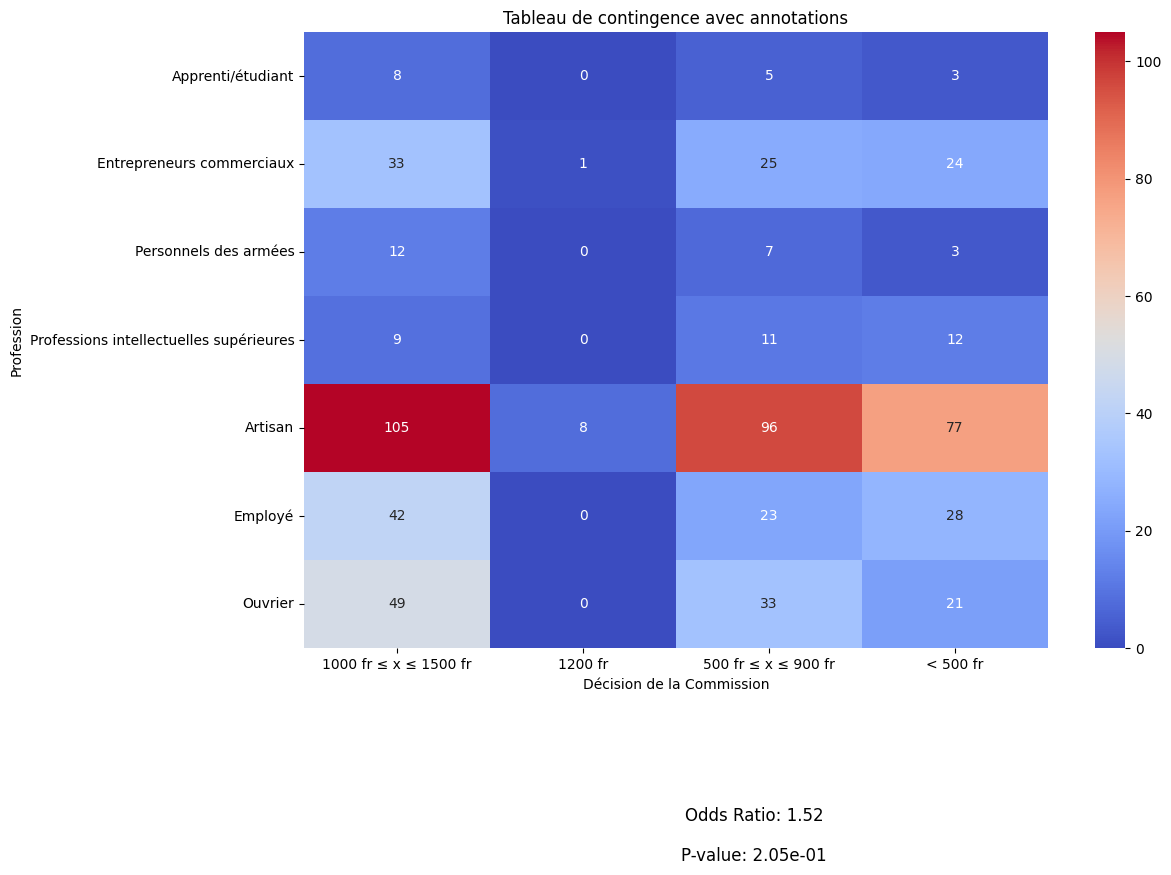

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Créer le tableau de contingence à partir des données de la capture d'écran
data = np.array([
    [8, 0, 5, 3],  # Apprenti/étudiant
    [33, 1, 25, 24],  # Entrepreneurs commerciaux
    [12, 0, 7, 3],  # Personnels des armées
    [9, 0, 11, 12],  # Professions intellectuelles supérieures
    [105, 8, 96, 77],  # Artisan
    [42, 0, 23, 28],  # Employé
    [49, 0, 33, 21]  # Ouvrier
])

# Conversion en DataFrame pour une meilleure visualisation
df = pd.DataFrame(data, columns=['1000 fr ≤ x ≤ 1500 fr', '1200 fr', '500 fr ≤ x ≤ 900 fr', '< 500 fr'],
                  index=['Apprenti/étudiant', 'Entrepreneurs commerciaux', 'Personnels des armées', 'Professions intellectuelles supérieures', 'Artisan', 'Employé', 'Ouvrier'])

# Ajouter une colonne 'All' et une ligne 'All' pour les totaux
df['All'] = df.sum(axis=1)
df.loc['All'] = df.sum(axis=0)

print("Tableau de contingence:")
print(df)

# Sélection des données à comparer pour le test de Fisher
# Comparons 'Artisan' et 'Employé' pour '< 500 fr' et '500 fr ≤ x ≤ 900 fr'
data_to_compare = np.array([
    [96, 77],  # Artisan
    [23, 28]   # Employé
])

# Réalisation du test de Fisher sur les données sélectionnées
oddsratio, p_value = stats.fisher_exact(data_to_compare)
print(f"\nOdds Ratio: {oddsratio}")
print(f"P-value: {p_value}")

# Visualisation du tableau de contingence
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:-1, :-1], annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Tableau de contingence avec annotations")
plt.xlabel("Décision de la Commission")
plt.ylabel("Profession")

# Ajouter des annotations pour l'odds ratio et la p-value
plt.figtext(0.5, -0.1, f'Odds Ratio: {oddsratio:.2f}', ha='center', va='center', fontsize=12)
plt.figtext(0.5, -0.15, f'P-value: {p_value:.2e}', ha='center', va='center', fontsize=12)

plt.show()

Tableau de contingence:
                                            1000 fr ≤ x ≤ 1500 fr  1200 fr  \
Apprenti/étudiant                                               8        0   
Entrepreneurs commerciaux                                      33        1   
Personnels des armées                                          12        0   
Professions intellectuelles supérieures                         9        0   
Professions intellectuelles supérieures\lt                      0        0   
Artisan                                                       105        8   
Employé                                                        42        0   
Ouvrier                                                        49        0   
All                                                           258        9   

                                            500 fr ≤ x ≤ 900 fr  < 500 fr  All  
Apprenti/étudiant                                             5         3   16  
Entrepreneurs commerciaux        

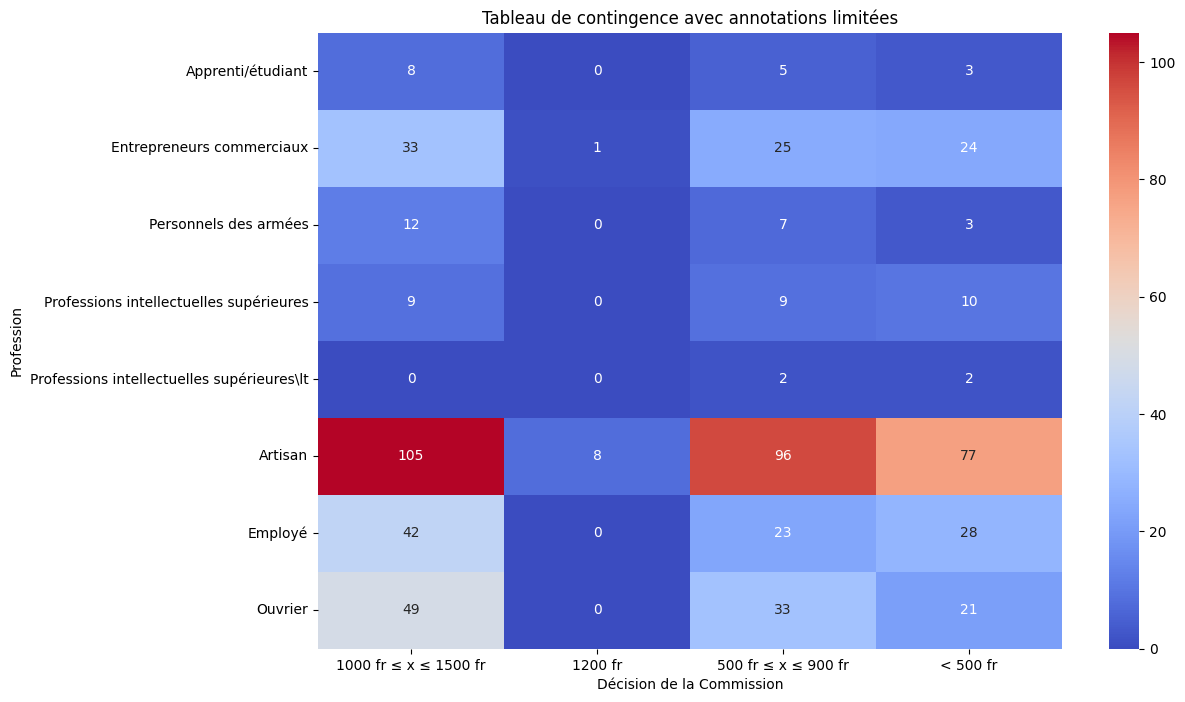

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Créer le tableau de contingence à partir des données de la capture d'écran
data = np.array([
    [8, 0, 5, 3],  # Apprenti/étudiant
    [33, 1, 25, 24],  # Entrepreneurs commerciaux
    [12, 0, 7, 3],  # Personnels des armées
    [9, 0, 9, 10],  # Professions intellectuelles supérieures
    [0, 0, 2, 2],  # Professions intellectuelles supérieures\lt
    [105, 8, 96, 77],  # Artisan
    [42, 0, 23, 28],  # Employé
    [49, 0, 33, 21]  # Ouvrier
])

# Conversion en DataFrame pour une meilleure visualisation
df = pd.DataFrame(data, columns=['1000 fr ≤ x ≤ 1500 fr', '1200 fr', '500 fr ≤ x ≤ 900 fr', '< 500 fr'],
                  index=['Apprenti/étudiant', 'Entrepreneurs commerciaux', 'Personnels des armées', 'Professions intellectuelles supérieures',
                         'Professions intellectuelles supérieures\lt', 'Artisan', 'Employé', 'Ouvrier'])

# Ajouter une colonne 'All' et une ligne 'All' pour les totaux
df['All'] = df.sum(axis=1)
df.loc['All'] = df.sum(axis=0)

print("Tableau de contingence:")
print(df)

# Fonction pour effectuer le test de Fisher pour chaque paire de professions et chaque modalité
def fisher_tests_for_all_pairs(dataframe):
    results = []
    professions = dataframe.index[:-1]  # Exclude the 'All' row
    modalities = dataframe.columns[:-1]  # Exclude the 'All' column

    for i, prof1 in enumerate(professions):
        for prof2 in professions[i+1:]:
            for modality in modalities:
                data_to_compare = np.array([
                    [dataframe.loc[prof1, modality], dataframe.loc[prof1, 'All'] - dataframe.loc[prof1, modality]],
                    [dataframe.loc[prof2, modality], dataframe.loc[prof2, 'All'] - dataframe.loc[prof2, modality]]
                ])
                oddsratio, p_value = stats.fisher_exact(data_to_compare)
                results.append({
                    'Profession 1': prof1,
                    'Profession 2': prof2,
                    'Modalité': modality,
                    'Odds Ratio': oddsratio,
                    'P-value': p_value
                })
    return pd.DataFrame(results)

# Exécuter les tests de Fisher pour toutes les paires de professions et toutes les modalités
all_results = fisher_tests_for_all_pairs(df)

# Affichage des résultats sous forme de tableau
print("\nRésultats des tests de Fisher pour chaque paire de professions et chaque modalité:")
print(all_results)

# Exporter les résultats dans un fichier CSV pour une meilleure lisibilité
all_results.to_csv('fisher_test_results.csv', index=False)

# Fonction pour filtrer les résultats significatifs
def filter_significant_results(results, alpha=0.05):
    return results[results['P-value'] < alpha]

# Filtrer les résultats significatifs
significant_results = filter_significant_results(all_results)

# Affichage des résultats significatifs
print("\nRésultats significatifs des tests de Fisher (p-value < 0.05):")
print(significant_results)

# Résumé statistique des résultats
def summary_statistics(results):
    summary = results.groupby('Modalité').agg(
        total_comparisons=('P-value', 'count'),
        significant_comparisons=('P-value', lambda x: (x < 0.05).sum())
    )
    summary['proportion_significant'] = summary['significant_comparisons'] / summary['total_comparisons']
    return summary

# Générer le résumé statistique
summary = summary_statistics(all_results)
print("\nRésumé statistique des résultats:")
print(summary)

# Exporter le résumé dans un fichier CSV
summary.to_csv('fisher_test_summary.csv')

# Visualisation des résultats significatifs
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:-1, :-1], annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Tableau de contingence avec annotations limitées")
plt.xlabel("Décision de la Commission")
plt.ylabel("Profession")

# Ajouter des annotations uniquement pour les résultats significatifs
for index, row in significant_results.iterrows():
    prof1 = row['Profession 1']
    modality = row['Modalité']
    oddsratio = row['Odds Ratio']
    p_value = row['P-value']
    plt.text(df.columns.get_loc(modality), df.index.get_loc(prof1), f'OR={oddsratio:.2f}\nP={p_value:.2e}',
             ha='center', va='center', color='black', fontsize=8, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.show()

# Générer un rapport détaillé avec tous les résultats
with open('fisher_test_report.txt', 'w') as f:
    f.write("Résultats des tests de Fisher pour chaque paire de professions et chaque modalité:\n")
    f.write(all_results.to_string())
    f.write("\n\nRésumé statistique des résultats:\n")
    f.write(summary.to_string())

La 1re valeur est le Khi² obs, la 2e la probabilité critique, la 3e le degré de liberte et dans le tableau les effectifs théoriques